In [1]:
import numpy as np
import pandas as pd
import os, re, random, gc
import pydicom as pdc
from datahandling_utils import createImageArray


In [2]:
SEED = 41
BATCH_SIZE = 64
random.seed(SEED)

In [3]:
label_path = "D:/AIFs/AIFs/durable/BorrSci_MR_Data/Output"
image_path = "D:/iCAT_IMAGES"

In [4]:
data = pd.read_csv("data_indices.csv", ",", index_col = 0)
data = data.sort_values(["Patient", "Volume", "Slice"], ignore_index=True)

C:\Users\Sven Alrik\AppData\Local\Temp\ipykernel_14316\4254050036.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("data_indices.csv", ",", index_col = 0)


In [24]:
patient = data.loc[(data['Patient']==14)]
array_i = createImageArray(patient)

In [25]:
array = array_i[:, 19, :, :]

In [26]:
import matplotlib.pyplot as plt
max_slopes = np.zeros((array.shape[1], array.shape[2]))
for row in range(array.shape[1]):
    for col in range(array.shape[2]):
        slopes = np.zeros(array.shape[0]-1)
        for i in range(array.shape[0]-1):
            slope = array[i+1, row, col] - array[i, row, col]
            slopes[i] = slope
        max_slopes[row, col] = np.max(slopes)



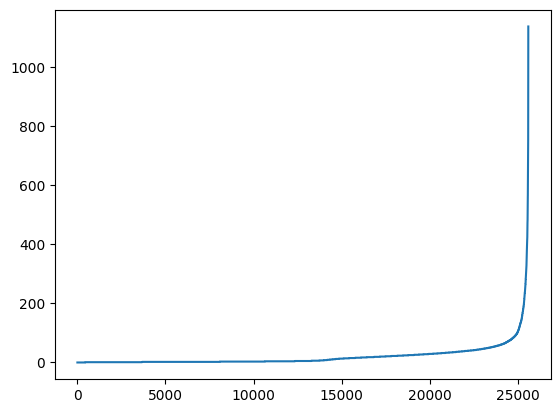

In [27]:
flat_sorted = np.sort(max_slopes.flatten())
plt.plot(flat_sorted)

In [28]:
from kneed import KneeLocator
kneedle = KneeLocator(list(range(len(flat_sorted))), flat_sorted, curve="convex", direction='increasing')

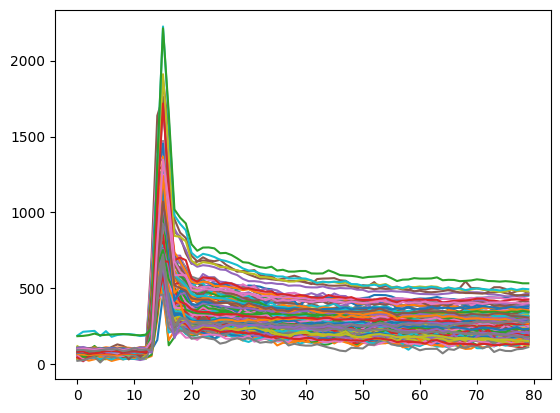

In [29]:
knee_value = flat_sorted[kneedle.elbow]
slope_filter = max_slopes >= knee_value
for row in range(array.shape[1]):
    for col in range(array.shape[2]):
        if slope_filter[row, col]:
            plt.plot(array[:, row, col])


In [32]:
filter_image = array[13,:,:]
filter_image[~slope_filter] = 0


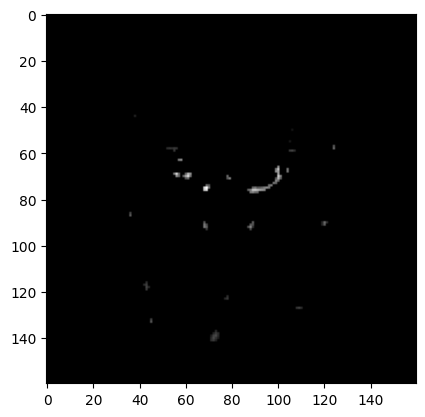

In [33]:
plt.imshow(filter_image, cmap='gray')

In [10]:
# _ = get_AIF_KMeans(slices, seed=SEED, visualize=True)

In [11]:
# class IndexTracker:
#     def __init__(self, ax, X):
#         self.ax = ax
#         ax.set_title('use scroll wheel to navigate images')

#         self.X = X
#         self.slices, rows, cols = X.shape
#         self.ind = self.slices//2

#         self.im = ax.imshow(self.X[self.ind, :, :])
#         self.update()

#     def on_scroll(self, event):
#         print("%s %s" % (event.button, event.step))
#         if event.button == 'up':
#             self.ind = (self.ind + 1) % self.slices
#         else:
#             self.ind = (self.ind - 1) % self.slices
#         self.update()

#     def update(self):
#         self.im.set_data(self.X[self.ind, :, :])
#         self.ax.set_ylabel('slice %s' % self.ind)
#         self.im.axes.figure.canvas.draw()



In [12]:
# %matplotlib qt
# fig, ax = plt.subplots(1, 1)

# tracker = IndexTracker(ax, slices)


# fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
# plt.show()